In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
from scipy.optimize import leastsq
from lmfit import minimize, Parameters, report_fit
%matplotlib inline

In [36]:
 readin = pd.read_csv("test.csv")

In [37]:
a = readin["FinalID"] == "MTD5089"

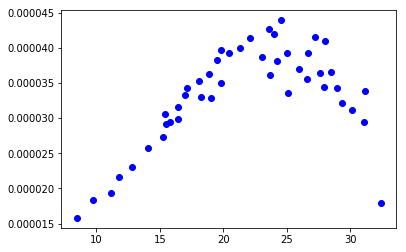

In [38]:
test = readin[a]
x = test.ConTemp
data = test.StandardisedTraitValue
plt.plot(x, data, 'bo')

In [39]:
params = Parameters()
params.add('a', value = 0.)
params.add('b', value = 0.)
params.add('c', value = 0.)
params.add('d', value = 0.)

In [40]:
def get_residual(params, x, data):
    a = params['a'].value 
    b = params['b'].value 
    c = params['c'].value 
    d = params['d'].value 
    
    model = a + b*x + c*x**2 + d*x**3
    
    return model - data

In [41]:
out = minimize(get_residual, params, args = (x, data))

In [42]:
report_fit(out)

[[Fit Statistics]]
    # function evals   = 12
    # data points      = 46
    # variables        = 4
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -1184.894
    Bayesian info crit = -1177.579
[[Variables]]
    a:   1.2840e-05 +/- 1.04e-05 (80.71%) (init= 0)
    b:  -1.4420e-06 +/- 1.67e-06 (115.70%) (init= 0)
    c:   2.6043e-07 +/- 8.49e-08 (32.61%) (init= 0)
    d:  -6.3762e-09 +/- 1.37e-09 (21.52%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(c, d)                      = -0.994 
    C(b, c)                      = -0.992 
    C(a, b)                      = -0.987 
    C(b, d)                      =  0.972 
    C(a, c)                      =  0.959 
    C(a, d)                      = -0.926 


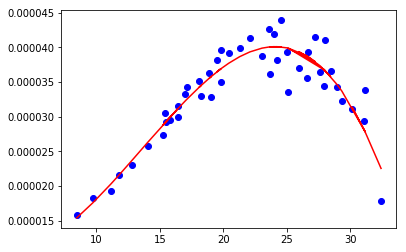

In [43]:
plt.plot(x, data, 'bo')
plt.plot(x, get_residual(out.params, x, data) + data, 'r')

In [59]:
sparams = Parameters()
sparams.add('B0', value = 0.1)
sparams.add('E', value = 0.1)
sparams.add('El', value = 0.1)
sparams.add('Eh', value = 0.1)
sparams.add('Tl', value = 0.1)
sparams.add('Th', value = 0.1)

sparams.add('e', value = np.exp(1), vary = False)
sparams.add('k', value = constants.value('Boltzmann constant in eV/K'), vary = False)

In [60]:
def schlfld_residual(sparams, x, data):
    B0 = sparams['B0'].value 
    E  = sparams['E'].value 
    El = sparams['El'].value 
    Eh = sparams['Eh'].value
    Tl = sparams['Tl'].value
    Th = sparams['Th'].value
    
    e = sparams['e'].value
    k = sparams['k'].value
    
    x = x + 273.15
    
    model = (B0*e**((-E/k)*((1/(x+ 273.15))-(1/283.15))))/(1+(e**(El/k)*((1/Tl)-(1/x)))+(e**(Eh/k)*((1/Th)-(1/(x+ 273.15)))))
    
    return model - data

In [61]:
out = minimize(schlfld_residual, sparams, args = (x, data))

In [68]:
report_fit(out)

[[Fit Statistics]]
    # function evals   = 9
    # data points      = 46
    # variables        = 6
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -934.414
    Bayesian info crit = -923.442
[[Variables]]
    B0:   0.10000000 +/- 0        (0.00%) (init= 0.1)
    E:    0.10000000 +/- 0        (0.00%) (init= 0.1)
    El:   0.10000000 +/- 0        (0.00%) (init= 0.1)
    Eh:   0.10000000 +/- 0        (0.00%) (init= 0.1)
    Tl:   0.10000000 +/- 0        (0.00%) (init= 0.1)
    Th:   0.10000000 +/- 0        (0.00%) (init= 0.1)
    e:    2.718282 (fixed)
    k:    8.61733e-05 (fixed)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  


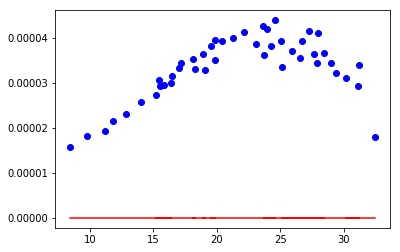

In [70]:
plt.plot(x, data, 'bo')
plt.plot(x, schlfld_residual(out.params, x, data) + data, 'r')

In [67]:
sparams

Parameters([('B0', <Parameter 'B0', 0.1, bounds=[-inf:inf]>),
            ('E', <Parameter 'E', 0.1, bounds=[-inf:inf]>),
            ('El', <Parameter 'El', 0.1, bounds=[-inf:inf]>),
            ('Eh', <Parameter 'Eh', 0.1, bounds=[-inf:inf]>),
            ('Tl', <Parameter 'Tl', 0.1, bounds=[-inf:inf]>),
            ('Th', <Parameter 'Th', 0.1, bounds=[-inf:inf]>),
            ('e',
             <Parameter 'e', value=2.7182818284590451 (fixed), bounds=[-inf:inf]>),
            ('k',
             <Parameter 'k', value=8.6173303e-05 (fixed), bounds=[-inf:inf]>)])